In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
import mnist, check_graph 
import graph_creation as g_c
import laplacian_eigenmaps as l_eig
import cauchy

In [3]:
mnist_data = mnist.get_mnist_data('../mnist')

In [4]:
U, diag, V = np.linalg.svd(np.array(mnist_data), full_matrices=False)
pca_mnist = np.dot(np.array(mnist_data), V[:10,:].T)

We tested:
    - L = [0.01,0.05,0.1,1]
    - nb_iter = [5,10,30,50] #maybe not enough..
    - sigma = 1
    - gamma = 2

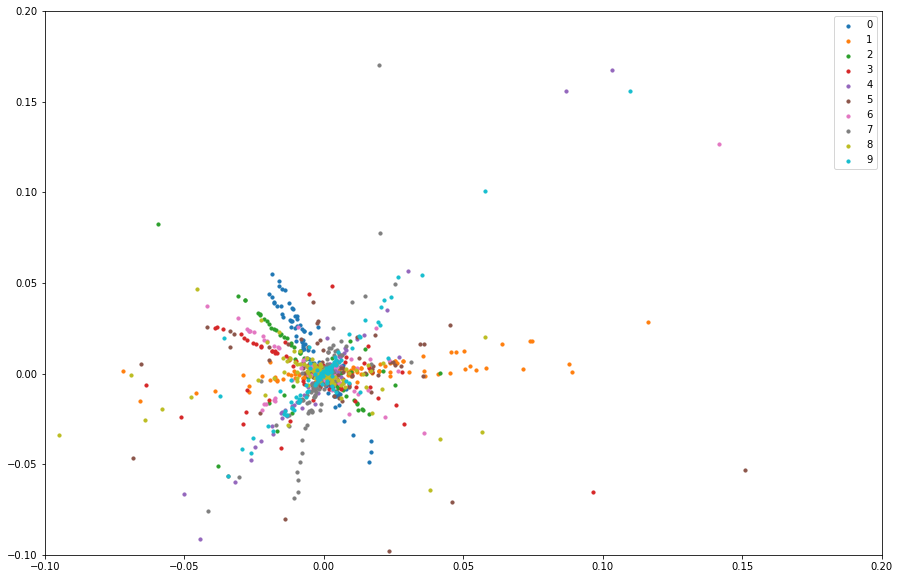

In [5]:
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

cauchy.plot_cauchy_eig(pca_mnist, range(10), args, sigma=1, gamma=2, nb_iter=10, L=0.05, xLim=(-.1,.2), yLim=(-.1,.2))

We notice that, even if the digits are not easy to distinguish, some structure emerges. Each digit is mostly represented along some very specific direction.

# Graph Factorization (non convex)

In [76]:
emb_dim = 2
args = {'edge_method': 'k_nearest', 'criteria': 5, 
        'weight_method': 'simple', 't_heatmap':1e20,
        'norm': 'l2'}

adj_mat = g_c.create_graph_on_data(np.array(mnist_data), **args)
n = adj_mat.shape[0]
degrees = np.diag(adj_mat.sum(axis=1))
L = degrees - adj_mat

In [144]:
def gradient(adj_mat, Y, lamb, i, j):
    return - (adj_mat[i,j] - np.dot(Y[i,:].T, Y[j,:]))*Y[j,:] - lamb* Y[i,:]
    

def sgd(adj_mat, emb_dim, init_w, nb_iter):
    n = adj_mat.shape[0]
    Y = np.random.uniform(-init_w,init_w, size=(n,emb_dim))
    t, itr = 1, 0
    while itr < nb_iter:
        for i in range(n):
            eta = 1/np.sqrt(t)
            for j in  np.where(adj_mat[i,i:]!=0)[0]:
                grad = gradient(adj_mat, Y, lamb, i, j)
                if abs(grad[0])<1 and abs(grad[0])<1:
                    Y[i,:] = Y[i,:] - eta*grad
            t += 1
        itr += 1
    return Y

We tested:
    - lamb = [0.01, 0.1, 1, 10]
    - nb_iter = [50,100,1000,5000]
    - init_weights = [0.1, 1]   (uniform distribution on [-init_w, init_w])

In [154]:
lamb = 1
init_w = 1
nb_iter = 100
Y_opt = sgd(adj_mat, emb_dim, init_w, nb_iter)

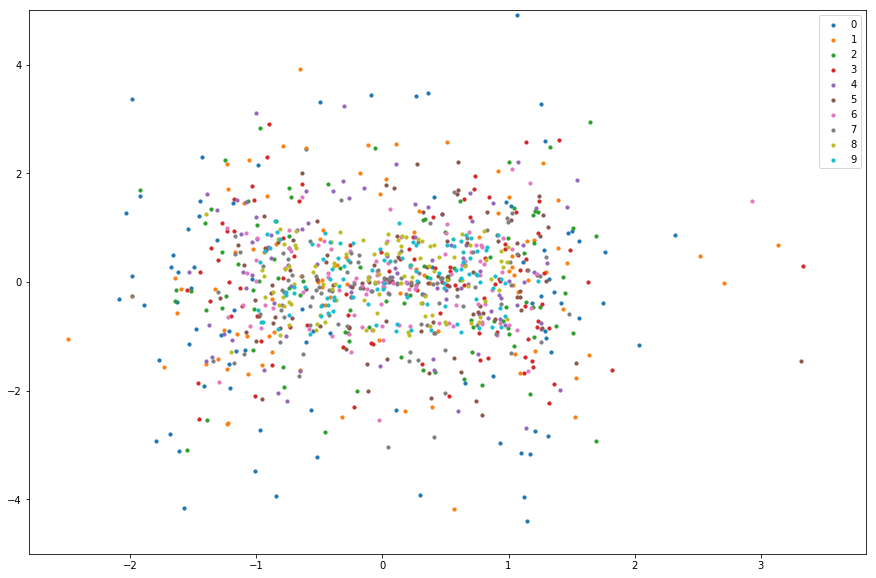

In [155]:
plt.figure(figsize = (15,10))
for i in range(10):
    plt.scatter(Y_opt[(100*i):(100*(i+1)),0], Y_opt[(100*i):(100*(i+1)),1], s=10, label=str(i))
plt.ylim(-5,5)
plt.legend()